In [1]:
#importing all necessary libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statistics
import datetime as dt

In [2]:
train  = pd.read_csv('train_set.csv', sep = ';')
train

,client_id,target
0,75063019,0
1,86227647,1
2,6506523,0
3,50615998,0
4,95213230,0
...,...,...
5995,71577803,0
5996,8128547,1
5997,26055781,0
5998,73504380,1


In [3]:
transactions = pd.read_csv('transactions.csv', sep = ';')
transactions

,client_id,datetime,code,type,sum
0,96372458,421 06:33:15,6011,2010,-561478.94
1,24567813,377 17:20:40,6011,7010,67377.47
2,21717441,55 13:38:47,6011,2010,-44918.32
3,14331004,263 12:57:08,6011,2010,-3368873.66
4,85302434,151 10:34:12,4814,1030,-3368.87
...,...,...,...,...,...
130034,15836839,147 11:50:53,5411,1010,-26344.59
130035,28369355,305 11:59:34,4829,2330,-24705.07
130036,40949707,398 21:13:58,5411,1110,-40353.72
130037,7174462,409 13:58:14,5411,1010,-25536.06


In [4]:
types = pd.read_csv('types.csv', sep = ';')
types

,type,type_description
0,8001,Установление расх. лимита по карте
1,2411,Перевод с карты на счет др.лица в одном тер. б...
2,4035,н/д(нет данных)
3,3001,Комиссия за обслуживание ссудного счета
4,2420,Перевод с карты на счет физ.лица в другом тер....
...,...,...
150,4110,Плата за получение наличных в АТМ.
151,2320,Безналичный перевод денежных средств через POS
152,7040,Перевод на карту (с карты) через POS (в предел...
153,2433,Перевод с карты на счет физ.лица в другом банк...


In [5]:
codes = pd.read_csv('codes.csv', sep = ';')
codes

,code,code_description
0,5944,"Магазины по продаже часов, ювелирных изделий и..."
1,5621,Готовые сумочные изделия
2,5697,"Услуги по переделке, починке и пошиву одежды"
3,7995,Транзакции по азартным играм
4,5137,"Мужская, женская и детская спец-одежда"
...,...,...
179,5044,"Офисное, фотографическое, фотокопировальное, и..."
180,5983,"Горючее топливо — уголь, нефть, разжиженный бе..."
181,5994,Дилеры по продаже печатной продукции
182,5192,"Книги, периодические издания и газеты"


In [6]:
df1 = pd.merge(transactions, train, on='client_id', how='inner')# we joined table Transactions with table train by column 'client_id'
df1

,client_id,datetime,code,type,sum,target
0,96372458,421 06:33:15,6011,2010,-561478.94,0
1,96372458,270 06:16:18,6011,7010,224591.58,0
2,96372458,97 10:48:35,4829,2370,-11229.58,0
3,96372458,445 07:33:38,4829,2330,-417695.42,0
4,96372458,4 09:33:46,4814,1030,-2245.92,0
...,...,...,...,...,...,...
91821,82133712,424 13:23:10,6011,2010,-17967.33,1
91822,82133712,232 09:38:10,6536,6110,179673.26,1
91823,12289409,108 11:13:33,6011,2010,-132509.03,0
91824,71829751,72 14:50:37,6011,2010,-44918.32,0


In [7]:
df2 = pd.merge(df1,types, on='type', how='inner') # we joined table df1 with table types by column 'type'
df2.head()

,client_id,datetime,code,type,sum,target,type_description
0,96372458,421 06:33:15,6011,2010,-561478.94,0,Выдача наличных в АТМ
1,96372458,68 02:04:11,6011,2010,-426724.00,0,Выдача наличных в АТМ
2,96372458,433 06:45:32,6011,2010,-112295.79,0,Выдача наличных в АТМ
3,21717441,55 13:38:47,6011,2010,-44918.32,0,Выдача наличных в АТМ
4,21717441,294 13:27:44,6011,2010,-898366.31,0,Выдача наличных в АТМ


In [8]:
df = pd.merge(df2, codes, on='code', how='inner')# we joined table df2 with table codes by column 'code'
df

,client_id,datetime,code,type,sum,target,type_description,code_description
0,96372458,421 06:33:15,6011,2010,-561478.94,0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
1,96372458,68 02:04:11,6011,2010,-426724.00,0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
2,96372458,433 06:45:32,6011,2010,-112295.79,0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
3,21717441,55 13:38:47,6011,2010,-44918.32,0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
4,21717441,294 13:27:44,6011,2010,-898366.31,0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
...,...,...,...,...,...,...,...,...
91795,38977682,286 00:00:00,3351,1200,-56332.06,1,Покупка. Зарубеж.,Агентства по аренде автомобилей
91796,61978280,401 00:00:00,5169,1200,-271194.78,1,Покупка. Зарубеж.,"Химикалии и смежные вещества, не классифициров..."
91797,97803699,371 19:47:00,6513,1210,-60792.00,0,Покупка. POS Зарубеж.,Агенты и менеджеры по аренде недвижимости
91798,31009144,81 17:32:60,4411,1210,-904166.84,0,Покупка. POS Зарубеж.,Круизные линии


# I. Explore the dataset. Do the descriptive statistics.


In [9]:
df.shape

(91800, 8)

In [10]:
df.columns

Index(['client_id', 'datetime', 'code', 'type', 'sum', 'target',
       'type_description', 'code_description'],
      dtype='object')

In [11]:
df.nunique()

client_id            6000
datetime            81491
code                  173
type                   58
sum                 20856
target                  2
type_description       53
code_description      173
dtype: int64

In [12]:
df.duplicated(keep=False).sum()

36

In [13]:
df = df.drop_duplicates(keep="first")
df

,client_id,datetime,code,type,sum,target,type_description,code_description
0,96372458,421 06:33:15,6011,2010,-561478.94,0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
1,96372458,68 02:04:11,6011,2010,-426724.00,0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
2,96372458,433 06:45:32,6011,2010,-112295.79,0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
3,21717441,55 13:38:47,6011,2010,-44918.32,0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
4,21717441,294 13:27:44,6011,2010,-898366.31,0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
...,...,...,...,...,...,...,...,...
91795,38977682,286 00:00:00,3351,1200,-56332.06,1,Покупка. Зарубеж.,Агентства по аренде автомобилей
91796,61978280,401 00:00:00,5169,1200,-271194.78,1,Покупка. Зарубеж.,"Химикалии и смежные вещества, не классифициров..."
91797,97803699,371 19:47:00,6513,1210,-60792.00,0,Покупка. POS Зарубеж.,Агенты и менеджеры по аренде недвижимости
91798,31009144,81 17:32:60,4411,1210,-904166.84,0,Покупка. POS Зарубеж.,Круизные линии


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
client_id,91781.0,5.169316e+07,2.840042e+07,22899.00,27312913.00,53883700.00,75521890.00,99991245.00
code,91781.0,5.596175e+03,6.018742e+02,742.00,5251.00,5661.00,6010.00,9402.00
type,91781.0,2.549410e+03,2.295791e+03,1010.00,1030.00,1110.00,2370.00,8145.00
sum,91781.0,-1.663292e+04,6.233658e+05,-41500301.14,-21560.79,-5232.98,-1122.96,67377473.16
target,91781.0,4.911474e-01,4.999243e-01,0.00,0.00,0.00,1.00,1.00


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91781 entries, 0 to 91799
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         91781 non-null  int64  
 1   datetime          91781 non-null  object 
 2   code              91781 non-null  int64  
 3   type              91781 non-null  int64  
 4   sum               91781 non-null  float64
 5   target            91781 non-null  int64  
 6   type_description  91781 non-null  object 
 7   code_description  91781 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 6.3+ MB


In [16]:
df.isna().any()

client_id           False
datetime            False
code                False
type                False
sum                 False
target              False
type_description    False
code_description    False
dtype: bool

In [17]:
print('Number of dublicated rows in types: ', df.duplicated(keep=False).sum() )

Number of dublicated rows in types:  0


In [18]:
max(df['sum'])-min(df['sum']) #Measures of spread

108877774.3

In [19]:
df['sum'].quantile(0.75)-df['sum'].quantile(0.25) #IQR

20437.83

In [20]:
df['sum'].var() #variance

388584930106.0205

In [21]:
 df['sum'].std()

623365.8076170208

# II. Explanatory data analysis. Exploring the features, visualizations etc.

Check for balance of our target value

We can see that there is not much difference between them

Text(0.5, 1.0, 'Count of target variables')

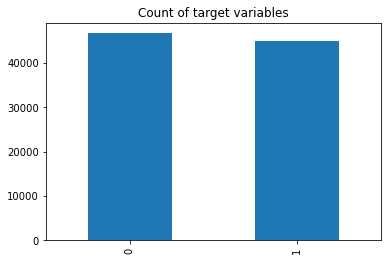

In [22]:
df.target.value_counts().plot(kind = 'bar')
plt.title("Count of target variables")

Distribution of out client's sum

Text(0.5, 1.0, 'Transaction sum of clients')

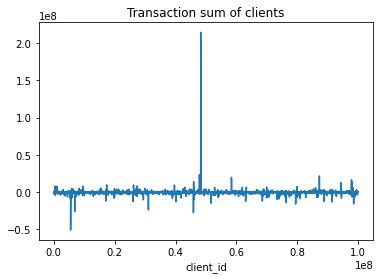

In [23]:
df.groupby("client_id")['sum'].agg(sum).plot()
plt.title("Transaction sum of clients")

We may notice a sharp jump at this point.

It means that we don't have many outliers. And we can see that on the boxplot

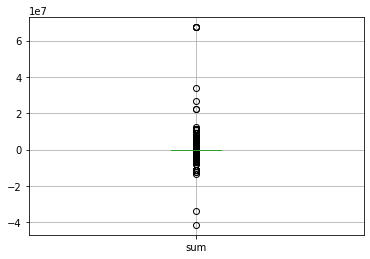

In [25]:
df.boxplot(column=['sum'])
plt.show()

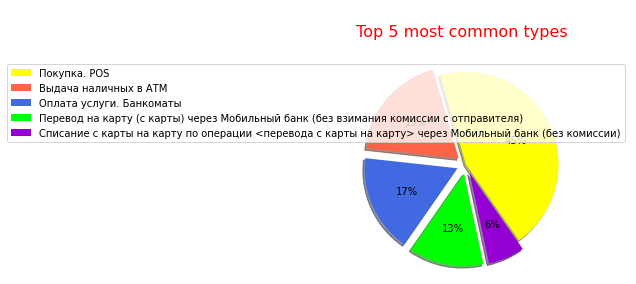

In [26]:
explode=(0,0.1,0.1,0.1,0.1)
labels= [x for x in df["type_description"].value_counts().sort_values(ascending=False)[0:5].index] # piechart for only top 5 industry
colors = ['yellow', 'tomato', 'royalblue', 'lime', 'darkviolet']

patches,ax,text= plt.pie(df["type_description"].value_counts().sort_values(ascending=False)[0:5],autopct="%0.0f%%", colors = colors, explode=explode,shadow=True,startangle=305)
plt.title('\n Top 5 most common types \n', size=16, color='red')
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.show()

D:\Anaconda\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


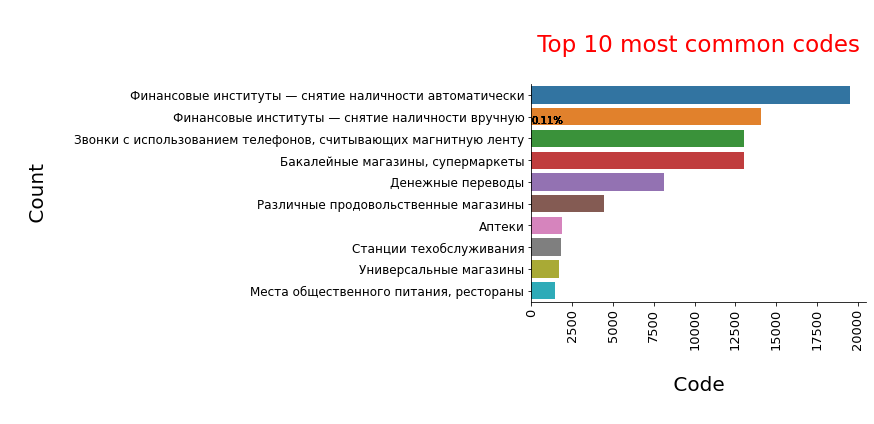

In [27]:
from IPython.core.pylabtools import figsize
df["code_description"].replace({"Различные продовольственные магазины — рынки, магазины со спец-ассортиментом, продажа полуфабрикатов, фирменных блюд, продажа с помощью торговых автоматов": "Различные продовольственные магазины"}, inplace=True)
fig, ax = plt.subplots(nrows=1, ncols=1)
a = sns.barplot(x= df["code_description"].value_counts().sort_values(ascending=False).head(10) ,y= df["code_description"].value_counts().sort_values(ascending=False).head(10).index)
sns.despine(bottom = False, left = False)
import matplotlib
from matplotlib import rcParams
spots = df["code_description"].value_counts().sort_values(ascending=False).index[0:10]
for p in ax.patches:
    ax.text(p.get_x() + 0.2, p.get_height()+0.5, '{:.2f}%'.format((p.get_height()/742)*100))
plt.title('\n Top 10 most common codes \n', size=23, color='red')
plt.xticks(fontsize=13,rotation=90)
plt.yticks(fontsize=12)
plt.xlabel('\n Code \n', fontsize=20, color='black')
plt.ylabel('\n Count \n', fontsize=20, color='black')
plt.show()

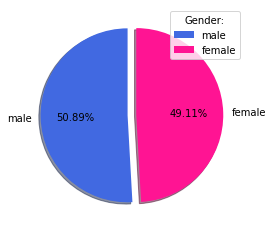

In [28]:
x = df['target'].value_counts()
labels = ["male", "female"]
explode = [0.1, 0]
colors = ['royalblue', 'deeppink']
plt.pie(x, labels = labels, startangle = 90, explode = explode, shadow = True, autopct='%.2f%%', colors = colors);
plt.legend(title = "Gender:")
plt.show()

### As we can see, there are more men than women

Покупка. POS                                                                                             33700
Выдача наличных в АТМ                                                                                    14135
Оплата услуги. Банкоматы                                                                                 12848
Перевод на карту (с карты) через Мобильный банк (без взимания комиссии с отправителя)                     9808
Списание с карты на карту по операции <перевода с карты на карту> через Мобильный банк (без комиссии)     4788
Взнос наличных через АТМ (в своем тер.банке)                                                              3529
Перевод на карту (с карты) через АТМ (в пределах одного тер.банка)                                        2092
Покупка.                                                                                                  1488
Покупка. Зарубеж.                                                                                         1243
П

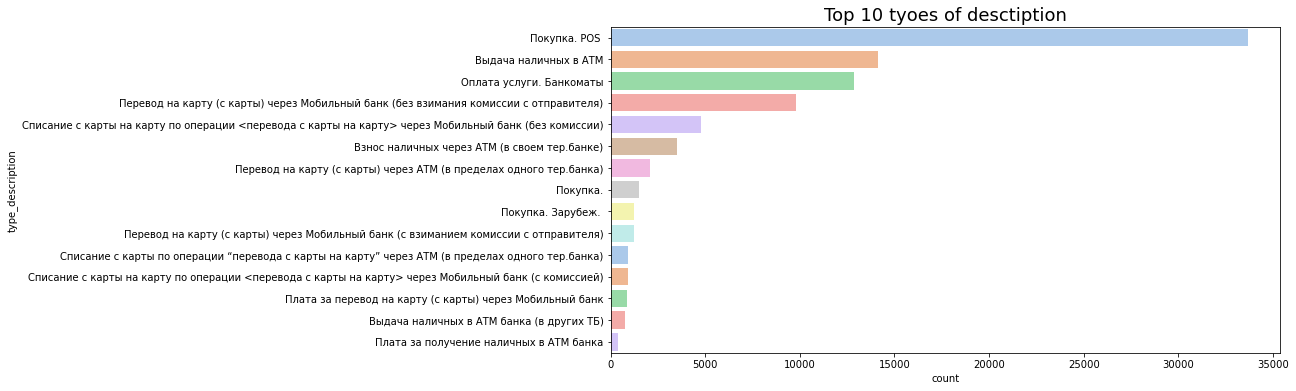

In [29]:
print(df["type_description"].value_counts()[:15])   # we counted the number of each type
plt.figure(figsize=(12,6))
sns.countplot(y='type_description',data = df,order =df["type_description"].value_counts().index[0:15],palette="pastel")
plt.title("Top 10 tyoes of desctiption",size=18)
plt.show()

20437.83 29533.785000000003 -52217.535
The following are the outliers in the boxplot:0        -561478.94
1        -426724.00
2        -112295.79
4        -898366.31
5       -1122957.89
            ...    
91795     -56332.06
91796    -271194.78
91797     -60792.00
91798    -904166.84
91799     -77535.30
Name: sum, Length: 20209, dtype: float64


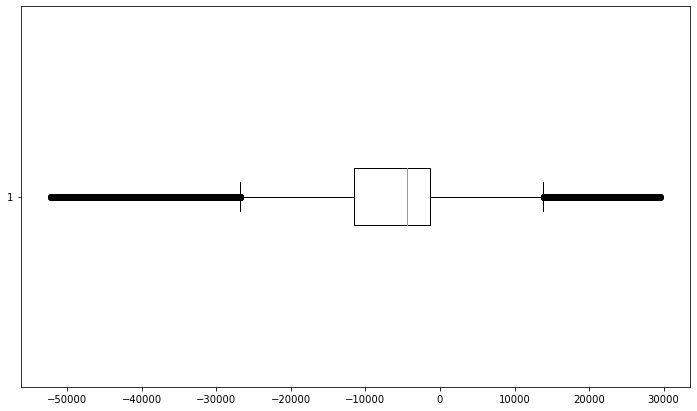

In [30]:
med = np.median(df['sum'])
iqr = (np.quantile(df['sum'], 0.75))-(np.quantile(df['sum'], 0.25))
# finding the boundaries
upper_bound = (np.quantile(df['sum'], 0.75))+(1.5*iqr)
lower_bound = (np.quantile(df['sum'], 0.25))-(1.5*iqr)
print(iqr, upper_bound, lower_bound)
# finding the outliers
outliers = df['sum'][(df['sum'] <= lower_bound) | (df['sum'] >= upper_bound)]
print('The following are the outliers in the boxplot:{}'.format(outliers))
# the data that are in this interval
arr2 = df['sum'][(df['sum'] >= lower_bound) & (df['sum'] <= upper_bound)]
# creating a boxplot
plt.figure(figsize=(12, 7))
plt.boxplot(arr2, vert=False)
plt.show()

In [31]:
df.groupby("type_description").size()

type_description
Безналичный перевод денежных средств через POS                                                              68
Взнос наличных через POS                                                                                   328
Взнос наличных через POS (в своем ТБ) по счету в овердрафте                                                  2
Взнос наличных через АТМ                                                                                   176
Взнос наличных через АТМ (в других ТБ) по счету в овердрафте                                                 3
Взнос наличных через АТМ (в своем ТБ) по счету в овердрафте                                                 24
Взнос наличных через АТМ (в своем тер.банке)                                                              3529
Возврат  покупки.                                                                                           26
Возврат  покупки. POS                                                                          

## 4. Feature engineering. Encodings, generating the features from date-time, sum and from other columns.

The first thing we will use is Mutual Information

Mutual information is much like correlation in the sense that it measures the relationship between two quantities. The advantage of mutual information is that it can detect any kind of relationships, while correlation detects only linear relationships.

In [32]:
df.shape

(91781, 8)

Through the df.shape function, we see the number of rows in our data is 91781. But if you notice, there are empty cells in the type_description column. They are designated as "н/д".

For our further actions, we need to get rid of them. To do this, we will use the drop() function.

In [33]:
df.drop(df[df.type_description == 'н/д'].index, inplace=True)
df.shape

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(91706, 8)

In [34]:
X = df.copy()
y = X.pop("sum")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

Scikit-learn has two mutual information metrics in its feature_selection module: one for real-valued targets (mutual_info_regression) and one for categorical targets (mutual_info_classif). Our target, price, is real-valued. The next cell computes the MI scores for our features and wraps them up in a nice dataframe.

In [35]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

type                0.543171
type_description    0.346060
target              0.010128
Name: MI Scores, dtype: float64

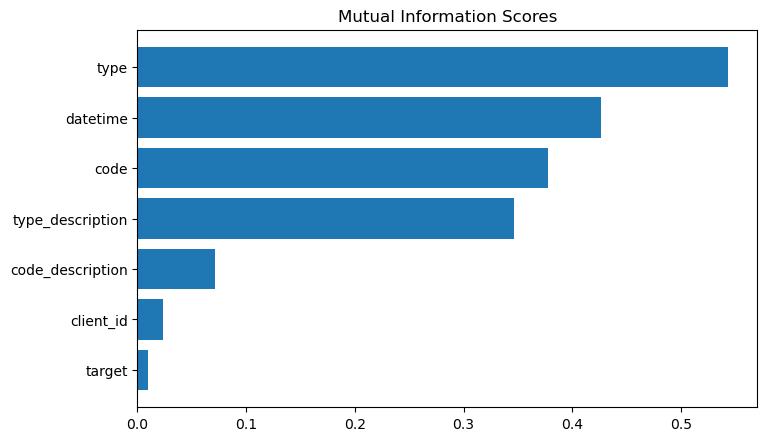

In [36]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

As we might expect, the high-scoring type feature exhibits a strong relationship with sum, the target.

Now we can calculate income and expenses. To calculate these calculations, we used the code below. In which if the amount is positive, it is income, and if negative, it is expenses.

In [38]:
df['income'] = df['sum'].where(df['sum'] > 0) 
df['expenses'] = df['sum'].where(df['sum'] <= 0)
df = df.replace(np.nan, 0)
income = df[df.income > 0].income
expenses = df[df.expenses < 0].expenses

<ipython-input-38-7fe7715e0b63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income'] = df['sum'].where(df['sum'] > 0)
<ipython-input-38-7fe7715e0b63>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['expenses'] = df['sum'].where(df['sum'] <= 0)


In [42]:
print('Average customer income: ', round(np.mean(income), 2))
print('Mode of income: ',  round(income.mode(), 2))
print('Median of income: ', round(np.median(income), 2))
print('STD of income: ', round(np.std(income), 2))
print("Variance of income set is % s" %(statistics.variance(income)))

print("-"*50)

print('Average customer expenses: ', round(np.mean(expenses), 2))
print('Mode of Expenses: ', expenses.mode())
print('Median of Expenses: ', round(np.median(expenses), 2))
print("Variance of Expenses set is % s" %(statistics.variance(expenses)))
print('STD of expenses: ', round(np.std(expenses), 2))

Average customer income:  164463.58
Mode of income:  0    22459.16
dtype: float64
Median of income:  22459.16
STD of income:  1201144.41
Variance of income set is 1442827663402.668
--------------------------------------------------
Average customer expenses:  -61100.02
Mode of Expenses:  0   -2245.92
dtype: float64
Median of Expenses:  -8983.66
Variance of Expenses set is 119907111999.0797
STD of expenses:  346273.71


## RFM Analysis

RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that use post purchase behavior to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

1) RECENCY (R): Days since last purchase

2) FREQUENCY (F): Total number of purchases

3) MONETARY VALUE (M): Total money this customer spent.

First of all, we need to design our datetime column beautifully, that is, write it in the correct form, year-month-day. To do this, we will use our following codes

In [44]:
days_hour = [i for i in df.datetime.str.split(' ')]  # list of days
days = [days_hour[i][0] for i in range(len(days_hour))]  # for every column in range of days_hour length
days = [int(i) for i in days]  
len(days)

91706

In [45]:
year_w_d = pd.date_range(end = "2021-01-01", periods = max(days)+1).tolist() # create list with different days
year = []   # create list
for i in range(len(days)): 
    for j in range(457):
        if days[i] == j:
            year.append(year_w_d[j]) # appending date to 'year' list
df['Time'] = year  # new column with date
df

,client_id,datetime,code,type,sum,target,type_description,code_description,income,expenses,Time
0,96372458,421 06:33:15,6011,2010,-561478.94,0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,0.0,-561478.94,2020-11-27
1,96372458,68 02:04:11,6011,2010,-426724.00,0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,0.0,-426724.00,2019-12-10
2,96372458,433 06:45:32,6011,2010,-112295.79,0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,0.0,-112295.79,2020-12-09
3,21717441,55 13:38:47,6011,2010,-44918.32,0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,0.0,-44918.32,2019-11-27
4,21717441,294 13:27:44,6011,2010,-898366.31,0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,0.0,-898366.31,2020-07-23
...,...,...,...,...,...,...,...,...,...,...,...
91795,38977682,286 00:00:00,3351,1200,-56332.06,1,Покупка. Зарубеж.,Агентства по аренде автомобилей,0.0,-56332.06,2020-07-15
91796,61978280,401 00:00:00,5169,1200,-271194.78,1,Покупка. Зарубеж.,"Химикалии и смежные вещества, не классифициров...",0.0,-271194.78,2020-11-07
91797,97803699,371 19:47:00,6513,1210,-60792.00,0,Покупка. POS Зарубеж.,Агенты и менеджеры по аренде недвижимости,0.0,-60792.00,2020-10-08
91798,31009144,81 17:32:60,4411,1210,-904166.84,0,Покупка. POS Зарубеж.,Круизные линии,0.0,-904166.84,2019-12-23


### Recency

To calculate recency, we need to choose a date point from which we evaluate how many days ago was the customer's last purchase.

In [59]:
#last date available in our dataset
now = df['Time'].max()

In [60]:
#group by customers and check last date of purshace
recency_df = df.groupby(by='client_id', as_index=False)['Time'].max()
recency_df.columns = ['client_id','LastPurshaceDate']
recency_df.head()

,client_id,LastPurshaceDate
0,22899,2020-12-17
1,27914,2020-07-21
2,28753,2020-12-09
3,38084,2020-12-05
4,49793,2020-12-15


In [62]:
#calculate recency
recency_df['Recency'] = recency_df['LastPurshaceDate'].apply(lambda x: (now - x).days)
recency_df.head()

,client_id,LastPurshaceDate,Recency
0,22899,2020-12-17,15
1,27914,2020-07-21,164
2,28753,2020-12-09,23
3,38084,2020-12-05,27
4,49793,2020-12-15,17


### Frequency

Frequency helps us to know how many times a customer purchased from us. To do that we need to check how many invoices are registered by the same customer.

In [50]:
# drop duplicates
df_copy = df
df_copy.drop_duplicates(subset=['Time', 'client_id'], keep="first", inplace=True)

#calculate frequency of purchases
frequency_df = df_copy.groupby(by=['client_id'], as_index=False)['Time'].count()
frequency_df.columns = ['client_id','Frequency']
frequency_df.head()

,client_id,Frequency
0,22899,9
1,27914,4
2,28753,13
3,38084,24
4,49793,20


### Monetary

Monetary attribute answers the question: How much money did the customer spent over time?

To do that, first, we will create a new column total cost to have the total price per invoice.

In [52]:
# Here we are calculating the monetary value of customer spend on using bank operations.
monetary_df = df.groupby(by='client_id',as_index=False)['sum'].sum()
monetary_df.columns = ['client_id','Monetary']
monetary_df.head()

,client_id,Monetary
0,22899,50847.54
1,27914,74115.21
2,28753,-2589800.29
3,38084,881439.06
4,49793,-708639.24


### Create RFM Table

In [63]:
#merge recency dataframe with frequency dataframe
temp_df = recency_df.merge(frequency_df,on='client_id')
temp_df.head()

,client_id,LastPurshaceDate,Recency,Frequency
0,22899,2020-12-17,15,9
1,27914,2020-07-21,164,4
2,28753,2020-12-09,23,13
3,38084,2020-12-05,27,24
4,49793,2020-12-15,17,20


In [64]:
#merge with monetary dataframe to get a table with the 3 columns
rfm_df = temp_df.merge(monetary_df,on='client_id')
#use CustomerID as index
rfm_df.set_index('client_id',inplace=True)
#check the head
rfm_df.head()

,LastPurshaceDate,Recency,Frequency,Monetary
client_id,,,,
22899,2020-12-17,15,9,50847.54
27914,2020-07-21,164,4,74115.21
28753,2020-12-09,23,13,-2589800.29
38084,2020-12-05,27,24,881439.06
49793,2020-12-15,17,20,-708639.24


In order to categorize clients into groups of their indicators, we shall feature the smallest recency which gets the best clients since the newest transactions are better and it implies that the client is probably still using the services. At the same time the biggest recency(the oldest transactions) is the worst option indicating a possible loss of a customer. The next way to categorize is according to the highest frequency which demonstrates the best clients who complete transactions regularly. The lowest frequency shows the most inactive customers or people who have completed a couple of random transactions. The latter may also be considered as a lost customer not holding much value in a dataset.
And the biggest absolute values from monetary_values column indicate the best clients with high financial value in a dataset(the transactions may be positive or negative numbers, that's why we use their absolute values). The smallest monetary values imply the smallest significance of clients generally in a dataset.

### Customer segments with RFM Model

The simplest way to create customers segments from RFM Model is to use Quartiles. We assign a score from 1 to 4 to Recency, Frequency and Monetary. Four is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.

Note: Quintiles (score from 1-5) offer better granularity, in case the business needs that but it will be more challenging to create segments since we will have 555 possible combinations. So, we will use quartiles.

In [65]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,9.0,5.0,-422174.7425
0.50,25.0,10.0,-146364.0900
0.75,66.0,18.0,-10926.3825


In [66]:
quantiles.to_dict()

{'Recency': {0.25: 9.0, 0.5: 25.0, 0.75: 66.0},
 'Frequency': {0.25: 5.0, 0.5: 10.0, 0.75: 18.0},
 'Monetary': {0.25: -422174.74249999993,
  0.5: -146364.08999999962,
  0.75: -10926.382500000002}}

Creation of RFM Segments

We will create two segmentation classes since, high recency is bad, while high frequency and monetary value is good.

In [67]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [68]:
#create rfm segmentation table
rfm_segmentation = rfm_df
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [69]:
rfm_segmentation.head()

,LastPurshaceDate,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
client_id,,,,,,,
22899,2020-12-17,15,9,50847.54,3,2,4
27914,2020-07-21,164,4,74115.21,1,1,4
28753,2020-12-09,23,13,-2589800.29,3,3,1
38084,2020-12-05,27,24,881439.06,2,4,4
49793,2020-12-15,17,20,-708639.24,3,4,1


Now that we have the score of each customer, we can represent our customer segmentation. First, we need to combine the scores (R_Quartile, F_Quartile,M_Quartile) together.

In [70]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,LastPurshaceDate,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
client_id,,,,,,,,
22899,2020-12-17,15,9,50847.54,3,2,4,324
27914,2020-07-21,164,4,74115.21,1,1,4,114
28753,2020-12-09,23,13,-2589800.29,3,3,1,331
38084,2020-12-05,27,24,881439.06,2,4,4,244
49793,2020-12-15,17,20,-708639.24,3,4,1,341


Best Recency score = 4: most recently purchase. Best Frequency score = 4: most quantity purchase. Best Monetary score = 4: spent the most.

Let's see who are our Champions (best customers).

In [72]:
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('Monetary', ascending=False).head(10)

,LastPurshaceDate,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
client_id,,,,,,,,
58383596,2020-12-30,2,20,19803721.69,4,4,4,444
97986854,2020-12-28,4,49,11245424.05,4,4,4,444
26211677,2020-12-27,5,32,9512122.35,4,4,4,444
39651887,2020-12-31,1,25,9441255.64,4,4,4,444
1013842,2020-12-29,3,29,8754247.73,4,4,4,444
94322959,2021-01-01,0,31,8670667.99,4,4,4,444
27445666,2021-01-01,0,23,8337002.41,4,4,4,444
9554115,2020-12-25,7,22,7998944.90,4,4,4,444
79937759,2020-12-30,2,40,7344080.75,4,4,4,444


# Supervised Learning.
## Predict gender

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import export_graphviz

Import data and store in Pandas DataFrame

In [83]:
train = pd.read_csv("train_set.csv", sep = ';')

In [84]:
test = pd.read_csv("test_set.csv", sep = ';')

In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   client_id  6000 non-null   int64
 1   target     6000 non-null   int64
dtypes: int64(2)
memory usage: 93.9 KB


In [86]:
train = pd.merge(transactions, train, on='client_id', how='right')

In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91826 entries, 0 to 91825
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   client_id  91826 non-null  int64  
 1   datetime   91826 non-null  object 
 2   code       91826 non-null  int64  
 3   type       91826 non-null  int64  
 4   sum        91826 non-null  float64
 5   day        91826 non-null  int64  
 6   time       91826 non-null  object 
 7   target     91826 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 6.3+ MB


Train model on 4 features: code, type, day, sum

In [88]:
train = train[['code','type','day', 'sum','target']]

In [89]:
X_train, y_train = train.drop('target', axis=1), train.target

Initialize parameters for RandomSearchCV

In [90]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [91]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

Declare RandormForestClassifier model

In [92]:
rfc = RandomForestClassifier()

In [93]:
rf_random = RandomizedSearchCV(estimator=rfc, param_distributions=random_grid, n_iter = 2, cv = 2, verbose=2,
                              random_state=52, n_jobs=8)

Fit on train data

In [94]:
rf_random.fit(X_train, y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=2, n_jobs=8,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=52, verbose=2)

As we don't have test data, we will predict on train

Best Parameters

In [95]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=100, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=600)

In [96]:
pred = rf_random.predict(X_train)

Metrics:

In [97]:
accuracy_score(y_train, pred)

0.8093023762333108

In [98]:
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82     46715
           1       0.83      0.77      0.80     45111

    accuracy                           0.81     91826
   macro avg       0.81      0.81      0.81     91826
weighted avg       0.81      0.81      0.81     91826



Train on DecisionTreeClassifier

In [99]:
dtc = DecisionTreeClassifier()

In [100]:
n_components = list(range(1,X_train.shape[1]+1,1))
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

Set parameters

In [101]:
parameters = {'criterion':criterion,
              'max_depth':max_depth}

In [102]:
dtc_GS = GridSearchCV(estimator = dtc, param_grid=parameters)

In [103]:
dtc_GS.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12]})

In [104]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [105]:
from sklearn import tree

Plot Decision Tree

In [ ]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(dtc, X_train, y_train,
                target_name="target",
                feature_names=X_train.columns,
                class_names=['MALE', 'FEMALE'], fontname='DejaVu Sans')

viz

Best Parameter for our model

In [145]:
dtc_GS.best_estimator_

DecisionTreeClassifier(max_depth=12)

In [146]:
preds = dtc_GS.best_estimator_.predict(X_train)

In [147]:
print(classification_report(y_train, preds))

              precision    recall  f1-score   support

           0       0.58      0.69      0.63     46715
           1       0.60      0.49      0.54     45111

    accuracy                           0.59     91826
   macro avg       0.59      0.59      0.58     91826
weighted avg       0.59      0.59      0.59     91826



Train on KNN and tune parameters with GridSearchCV

In [148]:
knn = KNeighborsClassifier()

In [149]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

In [150]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

In [151]:
grid_search = grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=  40.5s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=  43.9s


Metrics for each cross validation

In [110]:
X_train

,code,type,day,sum
0,4814,1030,397,-4491.83
1,6010,7070,86,4491.83
2,4814,1030,375,-3144.28
3,5411,1010,136,-3930.35
4,6011,2010,378,-4491.83
...,...,...,...,...
91821,5999,1100,452,-2243.45
91822,5411,1010,196,-4783.80
91823,5732,1010,186,-112273.33
91824,6010,7030,440,168443.68


In [121]:
train.target.value_counts()

0    46715
1    45111
Name: target, dtype: int64

/tmp/ipykernel_123696/2015625601.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=48, azim=134)


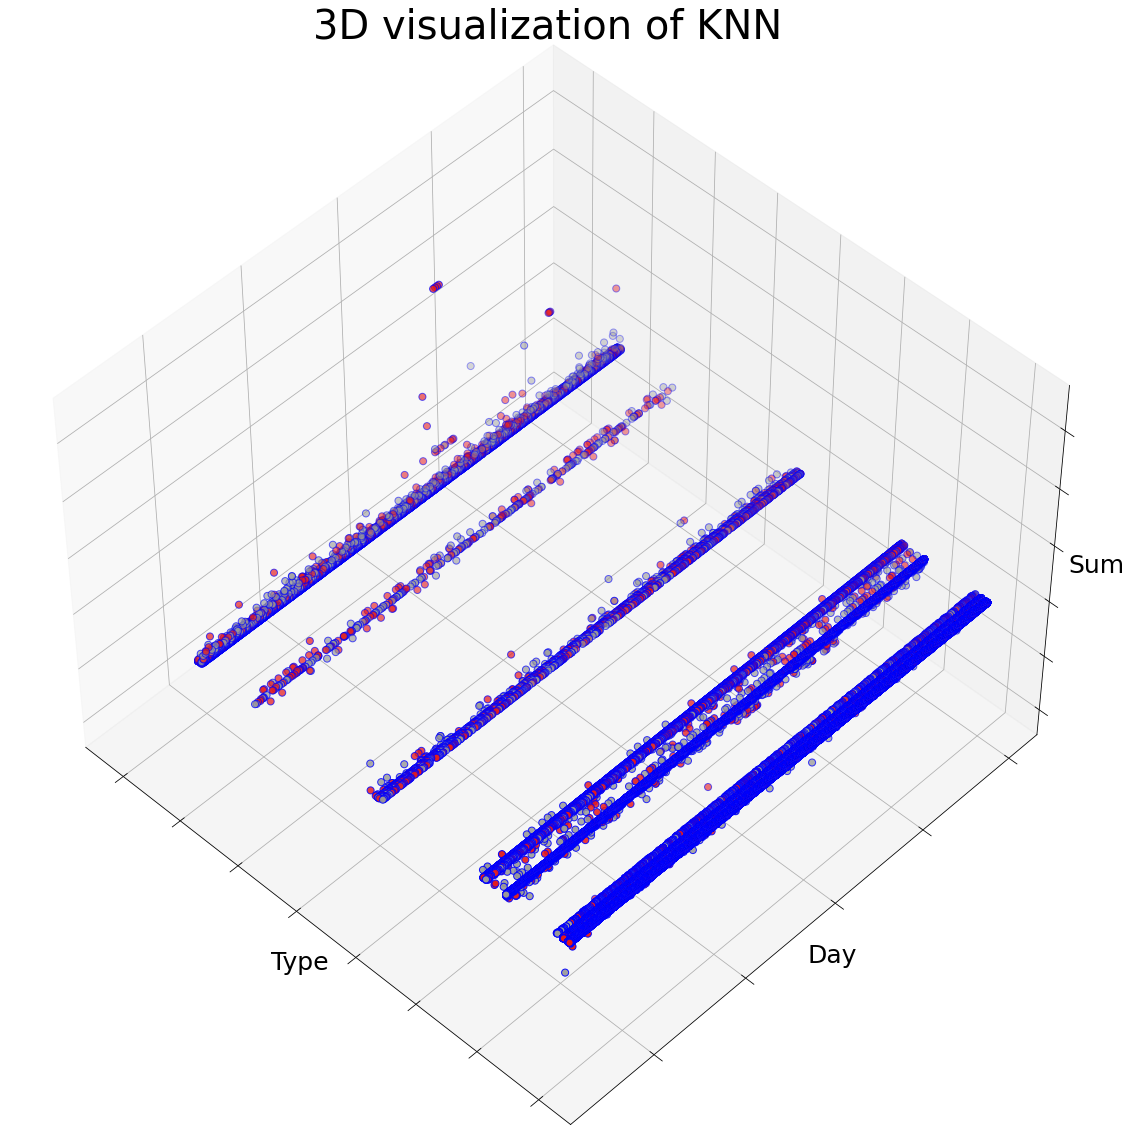

In [126]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(20, 15))
ax = Axes3D(fig, elev=48, azim=134)
ax.scatter(X_train.type, X_train.day, X_train['sum'], c=y_train,
           cmap=plt.cm.Set1, edgecolor='b', s = 50)

ax.set_title("3D visualization of KNN", fontsize=40)
ax.set_xlabel("Type", fontsize=25)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Day", fontsize=25)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Sum", fontsize=25)
ax.w_zaxis.set_ticklabels([])

plt.show()

In [152]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 51.47%


In [153]:
from sklearn.metrics import RocCurveDisplay

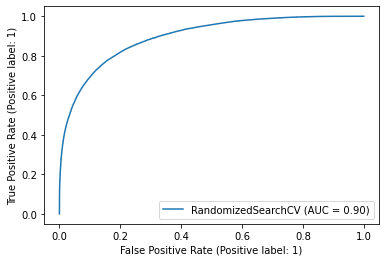

In [154]:
svc_disp = RocCurveDisplay.from_estimator(rf_random, X_train, y_train)

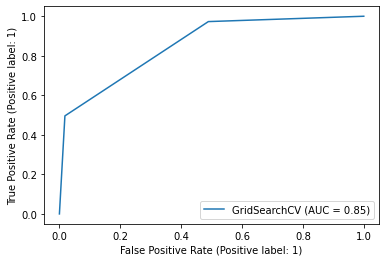

In [156]:
svc_disp = RocCurveDisplay.from_estimator(grid, X_train, y_train)

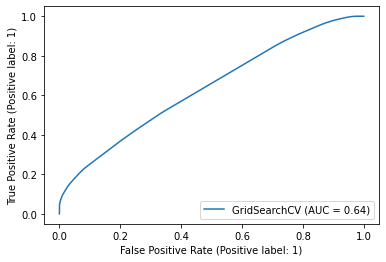

[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1600; total time= 2.7min
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1600; total time= 2.8min


In [158]:
svc_disp = RocCurveDisplay.from_estimator(dtc_GS, X_train, y_train)

### Conclusion. Supervised Learning Models
As the data is very small in size the classifier fails to perfectly fit the data and submit quite good accuracy.
Still RFC has a better score than othr models.
As decision tree models can fit appropriately over medium-small data ,it produces a larger accuracy.

have trained data in 3 models:
1) Random Forest Classifier

2) Decision Tree Classifier

3) KNearestNeighbors Classifier


All 3 models had evaluated by classification reports, that gives out metrics fit on our problem, as Recall, Precision, Accuracy, etc.

## Conclusion

We worked with sets of transaction data, codes, types to make it easier to divide clients into several clusters. The first step was to perform data preparation, which consists of processing null and duplicate values, as well as performing some descriptive statistics to get a basic understanding of our data. Then we did a preliminary analysis of the data using function visualization and created new functions for further unsupervised learning. In terms of developing functions, the RFM principle was used (in business analytics, it often use this concept to divide customers into different segments. Unsupervised machine learning consisted of two parts: k-means and hierarchical clustering. The K-means algorithm was implemented based on the principle to divide customers into general categories depending on their recency, frequency and monetary value. And hierarchical clustering was implemented in order to segment customers based on the similarity of their transactions. As a result, we were able to divide clients into different clusters based on different methodologies.